In [2]:
import numpy as np
import Wigner as wg
import mubs_utils as mub
import matplotlib.pyplot as plt
from sage.all import *

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
d = 27
F = GF(d); x = F.gen()
FF = [F(0)] + [x**j for j in range(26)]
len(FF)

27

In [6]:
mubs1  = np.load('../MUBS/3-3-desarguesian.npy')
mubs2  = np.load('../MUBS/3-3-desarguesian2.npy')
mubsk = np.load('../MUBS/3-3-albert.npy')

In [7]:
wootters = wg.Wigner(FF, mubs1)
kantor   = wg.Wigner(FF, mubsk, op='Albert')

<Axes: >

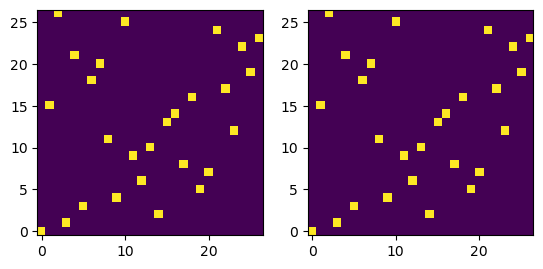

In [10]:
k = 5
j = 0
s = wg.npProj(mubsk[27*k:27*(k+1),j])

ww = wootters.WignerMatrix(s)
wk = kantor.WignerMatrix(s)

fig, axs = plt.subplots(1,2)
wg.plotHeat(ww, axs[0])
wg.plotHeat(wk, axs[1])

In [11]:
import matplotlib.pyplot as plt
from matplotlib import colors, cm

In [17]:
def PlotWigner(w):
    data_array = w.T

    fig = plt.figure(figsize=(8,8), dpi=400)
    
    ax = fig.subplots(subplot_kw = {'projection' : '3d'})
    ax.set_box_aspect(aspect=(4,4,3), zoom=0.85)
    ax.view_init(elev=30, azim=-45, roll=0)

    x_data, y_data = np.meshgrid(
        np.arange(data_array.shape[1]),
        np.arange(data_array.shape[0])
    )

    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = data_array.flatten()

    if z_data.min() == 0:
        ax.set_zlim(min(0, z_data.min()), z_data.max() + 1/64)
    else:
        ax.set_zlim(min(0, z_data.min()) - 1/64, z_data.max() + 1/64)

    offset = z_data + np.abs(z_data.min())
    fracs  = offset.astype(float) / offset.max()
    norm   = colors.Normalize(fracs.min(), fracs.max())
    color_vals = cm.viridis(norm(fracs.tolist()))

    ax.bar3d(
        x_data,
        y_data,
        np.zeros(len(z_data)),
        0.95, 0.95, z_data,
        color = color_vals
    )

    # labels = [r'$0$',r'$\sigma$',r'$\sigma^2$',r'$\sigma^3$',
              # r'$\sigma^4$',r'$\sigma^5$',r'$\sigma^6$',r'$\sigma^7$']
    
    # plt.xticks(np.arange(32), labels)
    # plt.yticks(np.arange(1, 33, 1), labels)

    plt.xlabel(r'$\alpha$', fontsize=20)
    plt.ylabel(r'$\beta$', fontsize=20)
    
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.set_zlabel(r'$W(\alpha,\beta)$', fontsize=20)

    ax.xaxis.labelpad=15
    ax.yaxis.labelpad=15
    ax.zaxis.labelpad=20

    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)

    fig.tight_layout()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=0.9)

    return (fig, ax)

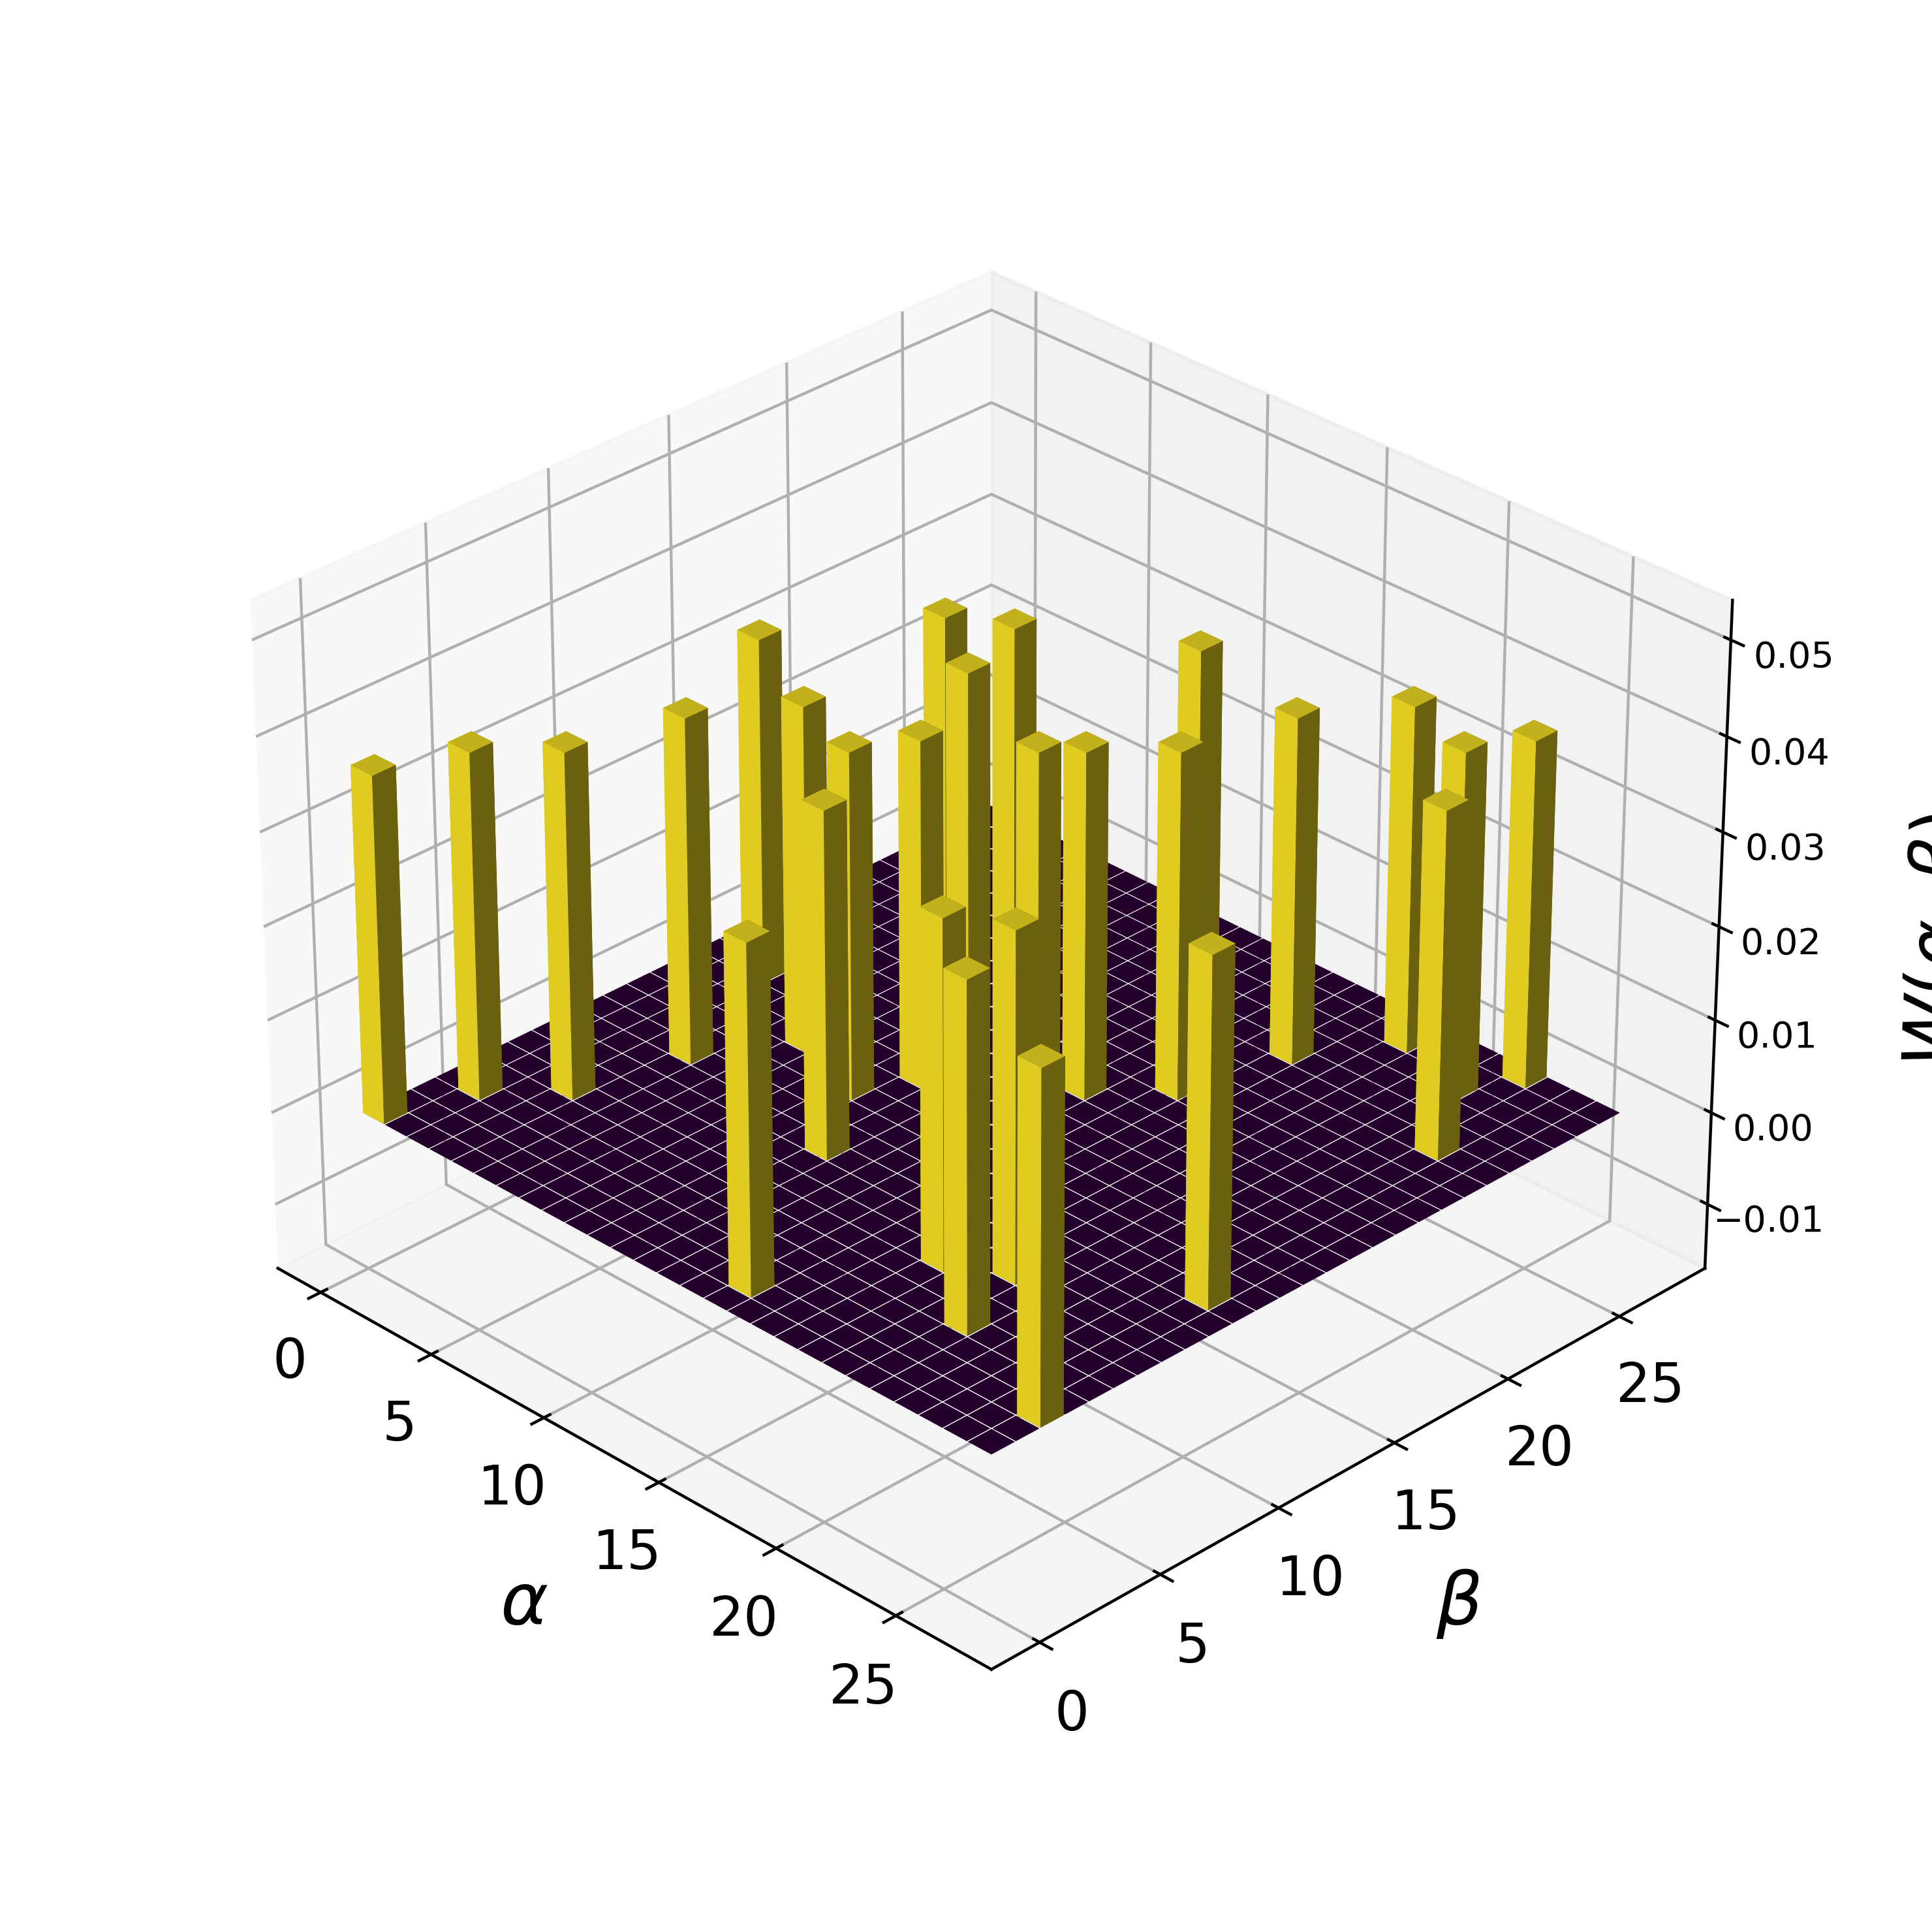

In [20]:
fig, ax = PlotWigner(np.rot90(ww.T))

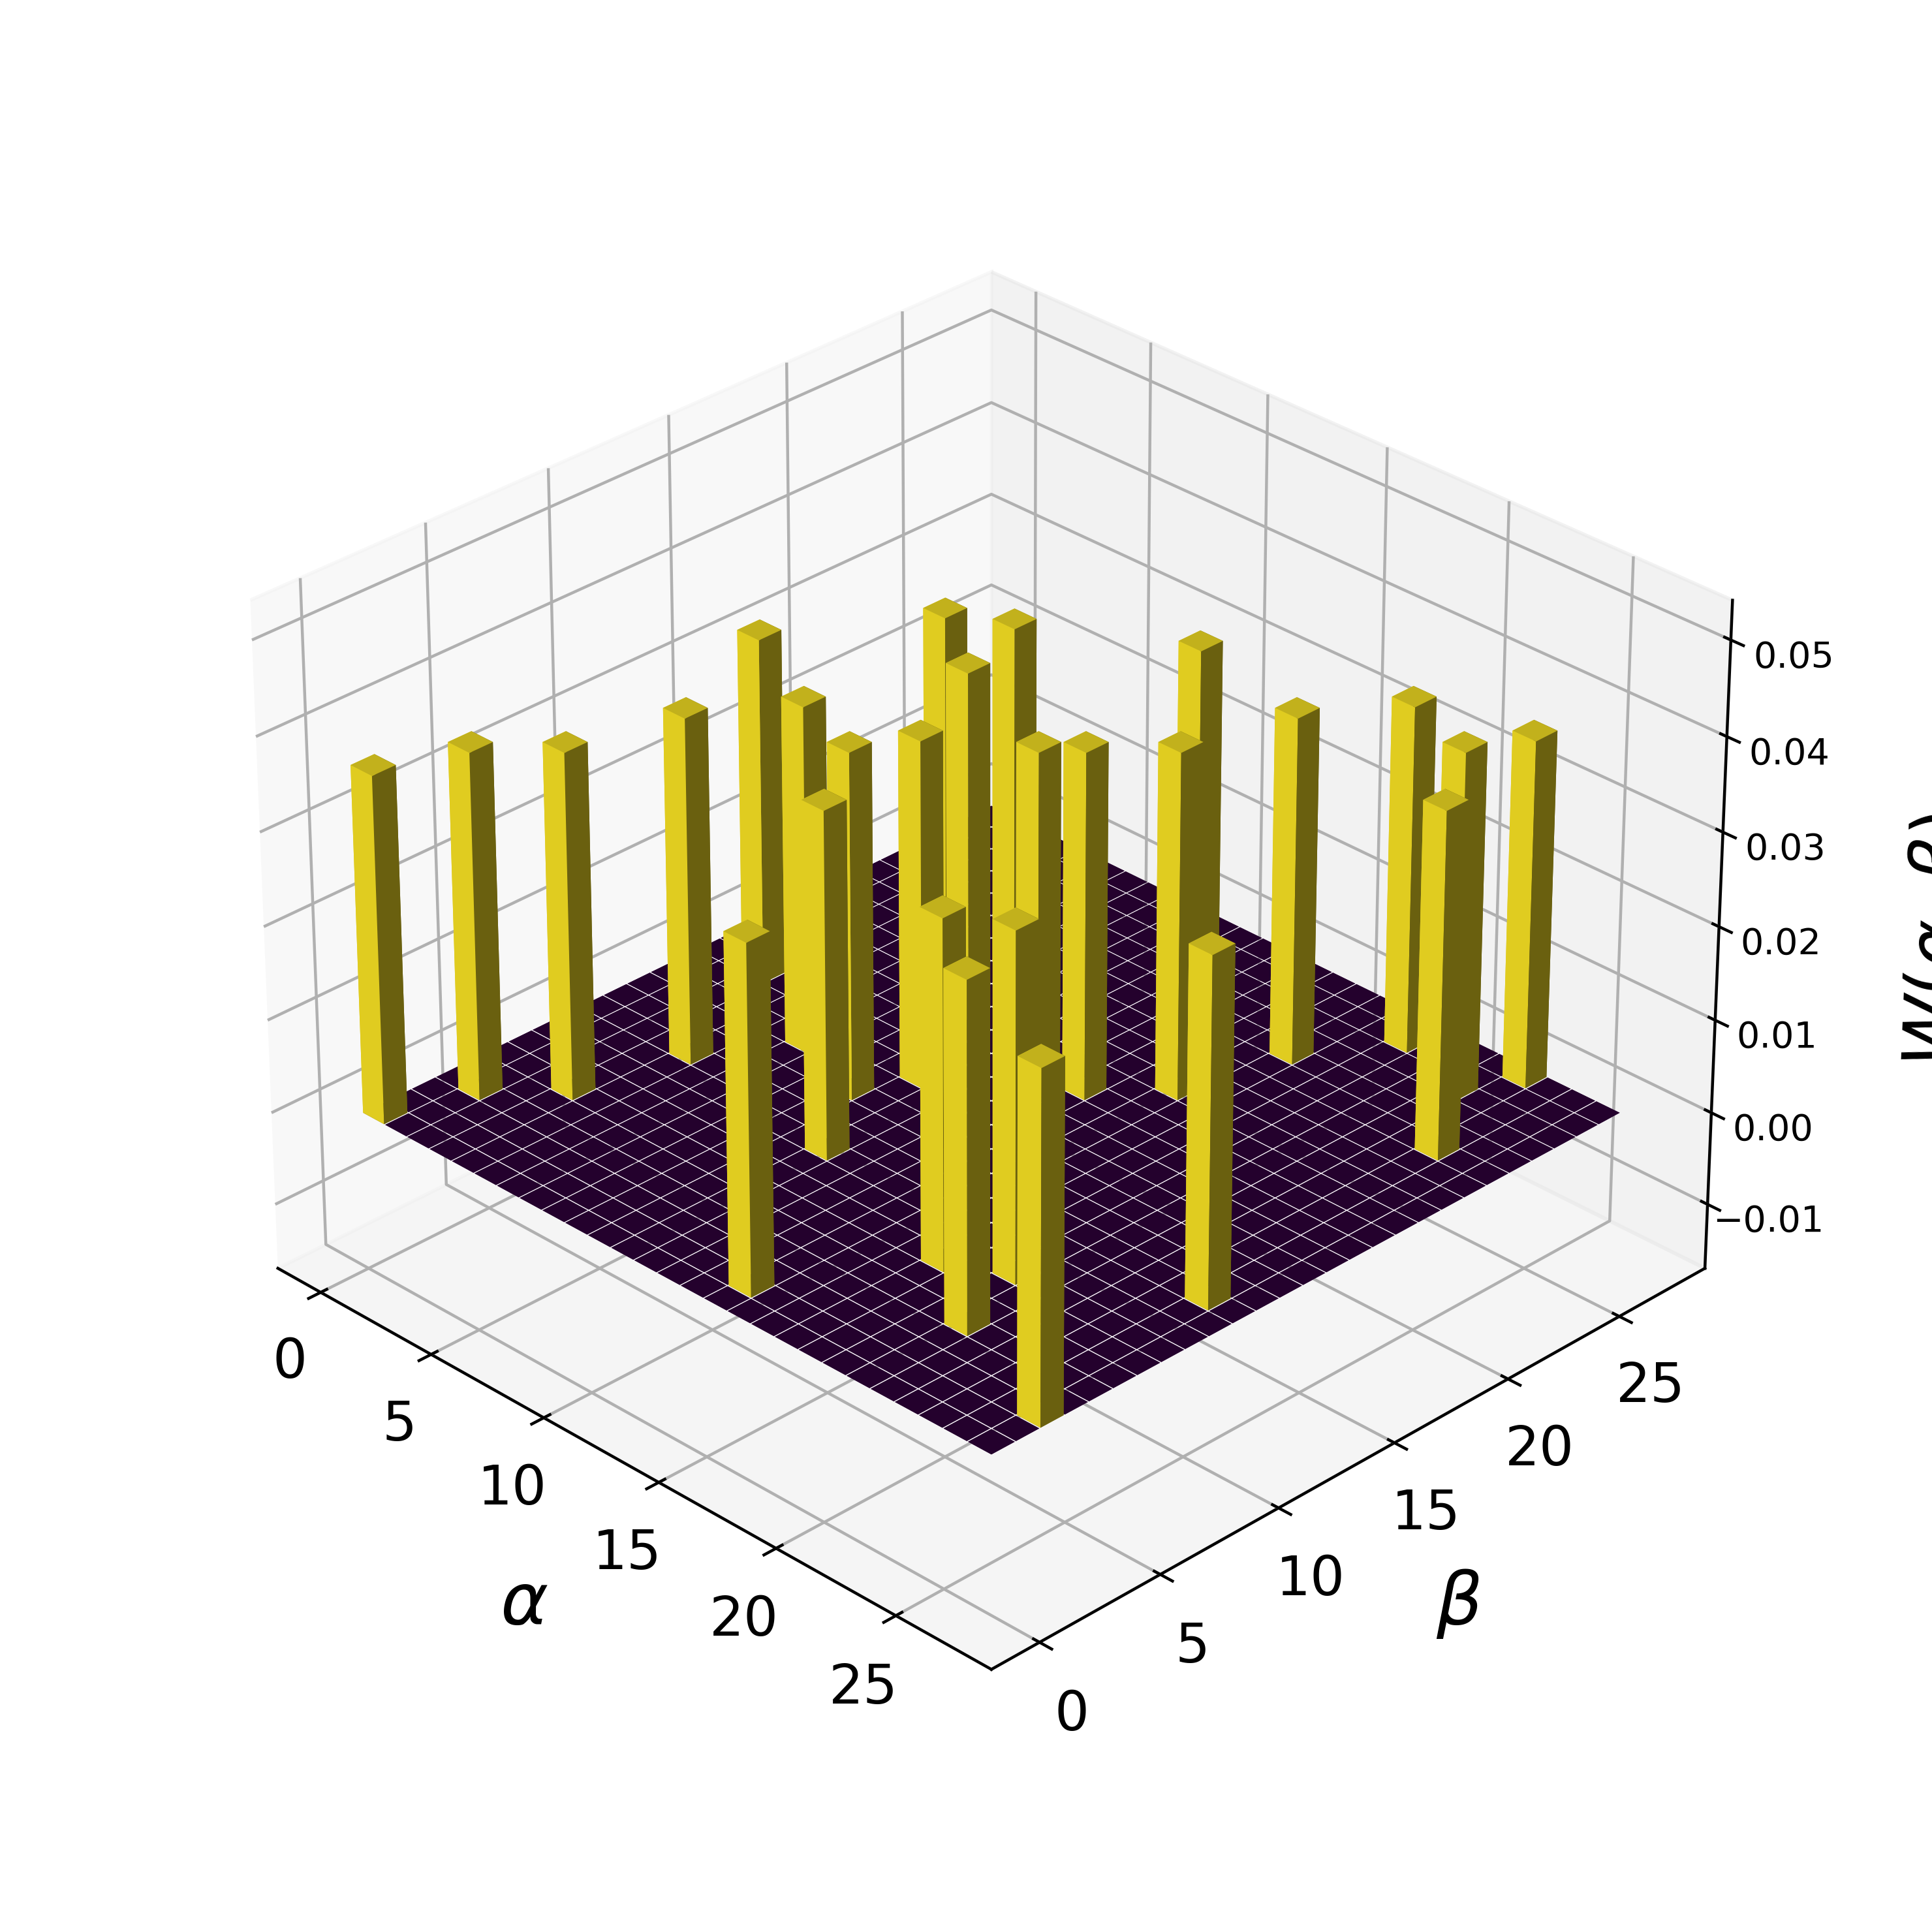

In [21]:
fig, ax = PlotWigner(np.rot90(wk.T))

In [26]:
bbox = fig.bbox_inches.from_bounds(1, 0.5, 7, 6)
fig.savefig('../../paper/pres_graphs/27_both.eps', format='eps', bbox_inches=bbox)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
